In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# creating a model class that inherits a module
# A bit of a oops concept we will use her to build the model

class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)

    def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features,h1) 
        self.fc2 = nn.Linear(h1,h2) 
        self.out = nn.Linear(h2,out_features) 

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)

        return x

In [4]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of model
model=Model()


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [7]:
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# preparing our dataset-converting string to float

df['Species'] = df['Species'].replace('Iris-setosa', 0.0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1.0)
df['Species'] = df['Species'].replace('Iris-virginica', 2.0)

df

<ipython-input-9-7a5ff9d4cfab>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2.0)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [10]:
# Train Test Split
X = df.drop(['Species','Id'], axis=1) # axis =1 means vertical axis or  deleting a column
y = df['Species'] 

In [11]:
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Species, Length: 150, dtype: float64


In [12]:
# Convert these to numpy arrays
X=X.values
y=y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train Test split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert Y features to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
# Set the criterion of model to measure the error and so on...

criterion = nn.CrossEntropyLoss()
#choose Adam optimmizer , lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
print(y_train.unique())  # Check unique class labels


tensor([0, 1, 2])


Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

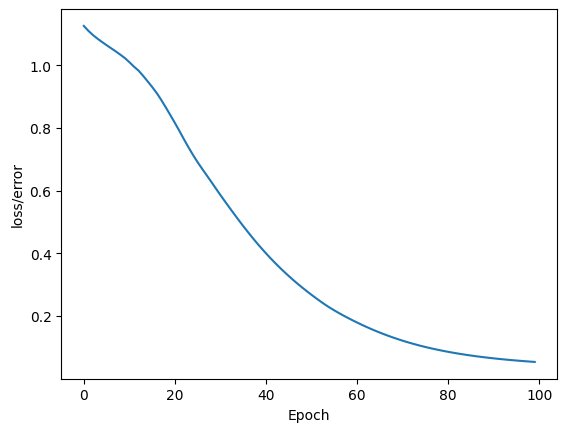

In [20]:
# train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and geta prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error , gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epcoh
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network of fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# **Plot the loss curve**
plt.plot(range(epochs), losses) 
plt.ylabel("loss/error") 
plt.xlabel('Epoch') 